<a href="https://colab.research.google.com/github/jpabonl/Proyecto-experimental/blob/main/Graficas_Toma_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Limpieza de archivos


In [ ]:
file_path = 'Muestras/DatosRef1/XrayHV80kV-1uA--CG20-FG10--Pos8-Ref-1Filtro--LiveTime300s--ConBloques.Spe'
data = np.loadtxt(file_path, skiprows=12)  # Se omite la primera fila que suele ser un encabezado


txt_file_path = 'Muestras/DatosRef1/XrayHV80kV-1uA--CG20-FG10--Pos8-Ref-1Filtro--LiveTime300s--ConBloques.txt'
np.savetxt(txt_file_path, data, fmt='%f', delimiter='\t')


Graficas de las calibraciones

In [ ]:
CG20 = pd.read_csv("Calibracion/Datos/GEMHV4200-0pF-FG10-CG20-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG50 = pd.read_csv("Calibracion/Datos/GEMHV4200-0pF-FG10-CG50-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG100 = pd.read_csv("Calibracion/Datos/GEMHV4200-0pF-FG10-CG100-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG200 = pd.read_csv("Calibracion/Datos/GEMHV4200-0pF-FG10-CG200-bothOutputswOneUni-3Fe55onDetector-120sLiveTime.txt")
CG500 = pd.read_csv("Calibracion/Datos/GEMHV4200-0pF-FG10-CG500-bothOutputswOneUni-3Fe55onDetector-300sLiveTime.txt")
CG1000 = pd.read_csv("Calibracion/Datos/GEMHV4200-0pF-FG10-CG1000-bothOutputswOneUni-3Fe55onDetector-600sLiveTime.txt")


# Graficar subplots
plt.subplot(2, 3, 1)
plt.plot(CG20)
plt.ylim(0, 1000)
plt.xlim(0, 500)
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(CG50)
plt.ylim(0, 300)
plt.xlim(0, 1500)
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(CG100)
plt.ylim(0, 125)
plt.xlim(0, 5000)
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(CG200)
plt.ylim(0, 200)
plt.xlim(0, 5000)
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(CG500)
plt.ylim(0, 100)
plt.xlim(0, 10000)
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(CG1000)
plt.ylim(0, 100)
plt.grid()

plt.tight_layout()  # Ajustar automáticamente los subplots para evitar superposiciones
plt.show()


Grafica Referencia

In [ ]:
Pos8Ref = pd.read_csv("Muestras/DatosRef1/XrayHV80kV-1uA--CG20-FG10--Pos8-Ref-1Filtro--LiveTime300s--ConBloques.txt")

11850.0


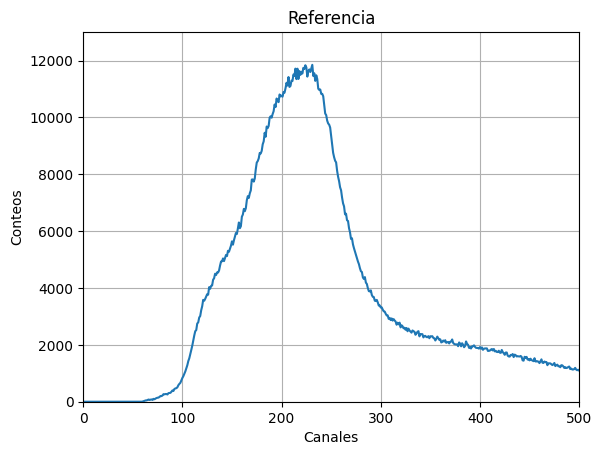

In [ ]:
plt.plot(Pos8Ref)
plt.xlim(0, 500)
plt.ylim(0, 13000)
plt.grid()
plt.title("Referencia")
plt.ylabel("Conteos")
plt.xlabel("Canales")
print(np.max(Pos8Ref))

Graficas muestras MoS2

In [ ]:
Pos1MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos1-MoS2-400nm--LiveTime300s--ConBloques.txt")
Pos4MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos4-MoS2-350nm--LiveTime300s--ConBloques.txt")
Pos5MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos5-MoS2-300nm--LiveTime300s--ConBloques.txt")
Pos6MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos6-MoS2-500nm--LiveTime300s--ConBloques.txt")
Pos7MoS2 = pd.read_csv("Muestras/DatosMoS2/XrayHV80kV-1uA--CG20-FG10--Pos7-MoS2-450nm--LiveTime300s--ConBloques.txt")

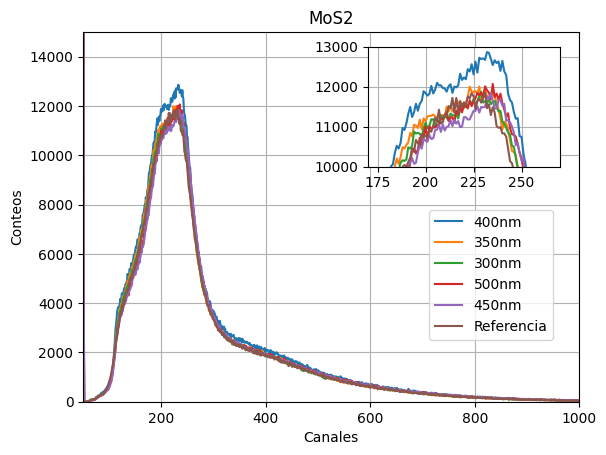

In [ ]:
plt.plot(Pos1MoS2, label="400nm")
plt.plot(Pos4MoS2, label="350nm")
plt.plot(Pos5MoS2, label="300nm")
plt.plot(Pos6MoS2, label="500nm")
plt.plot(Pos7MoS2, label="450nm")
plt.plot(Pos8Ref, label="Referencia")
plt.ylim(0, 15000)
plt.xlim(50, 1000)
plt.grid()
plt.xlabel("Canales")
plt.ylabel("Conteos")
plt.title("MoS2")
# Definir los límites para el zoom-in
xmin = 170
xmax = 270
ymin = 10000
ymax = 13000

# Crear un área para el zoom-in en la esquina derecha
zoom_ax = plt.axes([0.57, 0.6, 0.3, 0.25])  # [left, bottom, width, height]
zoom_ax.plot(Pos1MoS2, label="400nm")
zoom_ax.plot(Pos4MoS2, label="350nm")
zoom_ax.plot(Pos5MoS2, label="300nm")
zoom_ax.plot(Pos6MoS2, label="500nm")
zoom_ax.plot(Pos7MoS2, label="450nm")
zoom_ax.plot(Pos8Ref, label="Referencia")
zoom_ax.set_ylim(ymin, ymax)
zoom_ax.set_xlim(xmin, xmax)

zoom_ax.grid()

# Mostrar la leyenda en la gráfica principal
plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')
# Mostrar la gráfica completa con el zoom-in
plt.show()


Graficas muestras WS2


In [ ]:
Pos2WS2 = pd.read_csv("Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos2-WS2-350nm--LiveTime300s--ConBloques.txt")
Pos3WS2 = pd.read_csv("Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos3-WS2-300nm--LiveTime300s--ConBloques.txt")

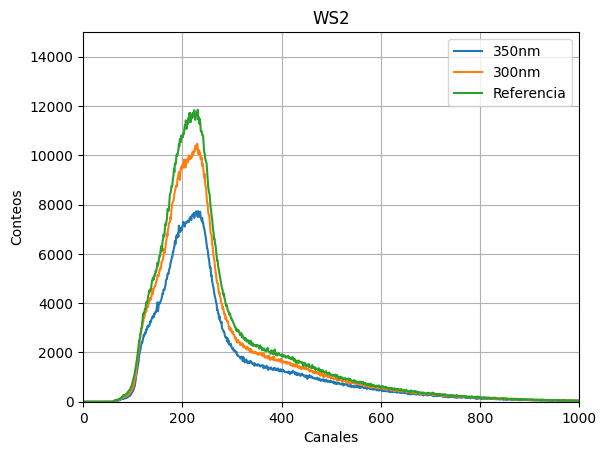

In [ ]:
plt.plot(Pos2WS2, label="350nm")
plt.plot(Pos3WS2, label="300nm")
plt.plot(Pos8Ref, label="Referencia")
plt.xlim(0,1000)
plt.ylim(0, 15000)
plt.grid()
plt.title("WS2")
plt.ylabel("Conteos")
plt.xlabel("Canales")
plt.legend()
plt.show()

Normalización de la grafica de WS2


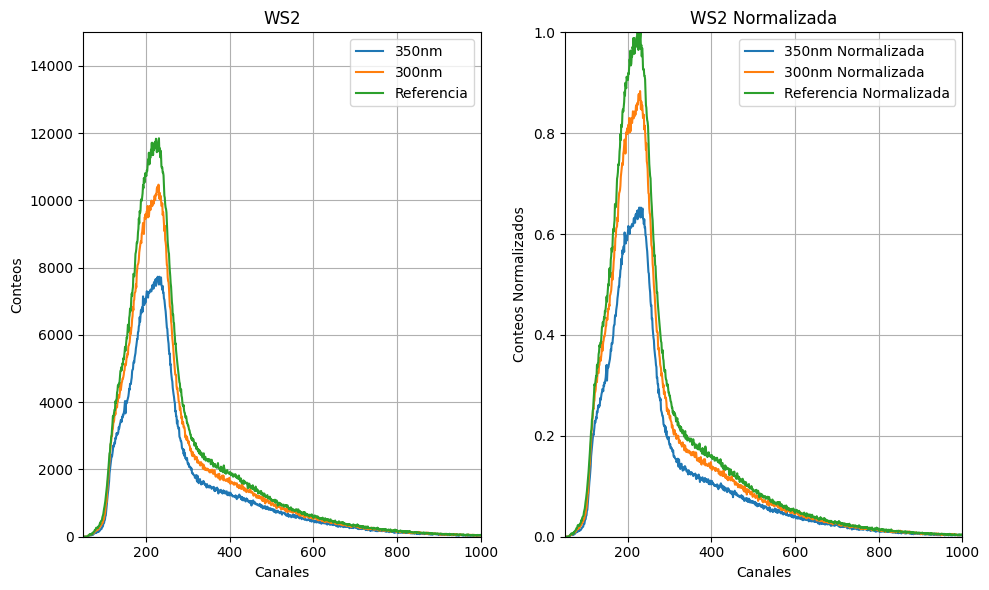

Diferencia relativa media de Pos2WS2_normalized respecto a Pos8Ref_normalized: 0.33113000998513686
Diferencia relativa media de Pos3WS2_normalized respecto a Pos8Ref_normalized: 0.12252589709771705


In [ ]:
# Calcular los máximos y mínimos de Pos8Ref
max_Pos8Ref = np.max(Pos8Ref)
min_Pos8Ref = np.min(Pos8Ref)

# Normalizar los datos de Pos2WS2 y Pos3WS2 utilizando los máximos y mínimos de Pos8Ref
Pos2WS2_normalized = (Pos2WS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos3WS2_normalized = (Pos3WS2 - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)
Pos8Ref_normalized = (Pos8Ref - min_Pos8Ref) / (max_Pos8Ref - min_Pos8Ref)

# Graficar la función original y la función normalizada
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(Pos2WS2, label='350nm')
plt.plot(Pos3WS2, label='300nm')
plt.plot(Pos8Ref, label='Referencia')
plt.xlim(50, 1000)
plt.ylim(0, 15000)
plt.grid()
plt.title('WS2')
plt.ylabel('Conteos')
plt.xlabel('Canales')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Pos2WS2_normalized, label='350nm Normalizada')
plt.plot(Pos3WS2_normalized, label='300nm Normalizada')
plt.plot(Pos8Ref_normalized, label='Referencia Normalizada')
plt.xlim(50, 1000)
plt.ylim(0, 1)
plt.grid()
plt.title('WS2 Normalizada')
plt.ylabel('Conteos Normalizados')
plt.xlabel('Canales')
plt.legend()

plt.tight_layout()
plt.show()

diff_Pos2WS2 = np.abs(Pos2WS2_normalized - Pos8Ref_normalized)

# Calcular la diferencia relativa entre Pos3WS2_normalized y Pos8Ref_normalized
diff_Pos3WS2 = np.abs(Pos3WS2_normalized - Pos8Ref_normalized)

# Calcular el promedio de las diferencias relativas
mean_diff_Pos2WS2 = np.mean(diff_Pos2WS2)*100
mean_diff_Pos3WS2 = np.mean(diff_Pos3WS2)*100

print("Diferencia relativa media de Pos2WS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos2WS2)
print("Diferencia relativa media de Pos3WS2_normalized respecto a Pos8Ref_normalized:", mean_diff_Pos3WS2)

In [ ]:
# Guardar Pos2WS2_normalized en un archivo de texto
np.savetxt('Pos2WS2_normalized.txt', Pos2WS2_normalized)

# Guardar Pos3WS2_normalized en un archivo de texto
np.savetxt('Pos3WS2_normalized.txt', Pos3WS2_normalized)

# Guardar Pos8Ref_normalized en un archivo de texto
np.savetxt('Pos8Ref_normalized.txt', Pos8Ref_normalized)


Grafica con barras de error


In [ ]:
import pandas as pd

# Lee el archivo de texto
data = pd.read_csv('Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos3-WS2-300nm--LiveTime300s--ConBloques.txt', sep='\t')  # Puedes cambiar el separador según sea necesario

# Guarda los datos en un archivo de Excel
data.to_excel('Pos3WS2.xlsx', index=False)  # index=False evita que se incluya el índice en el archivo Excel



Datos WS2 sin normalizar

Datos normalizados WS2 Barras de error


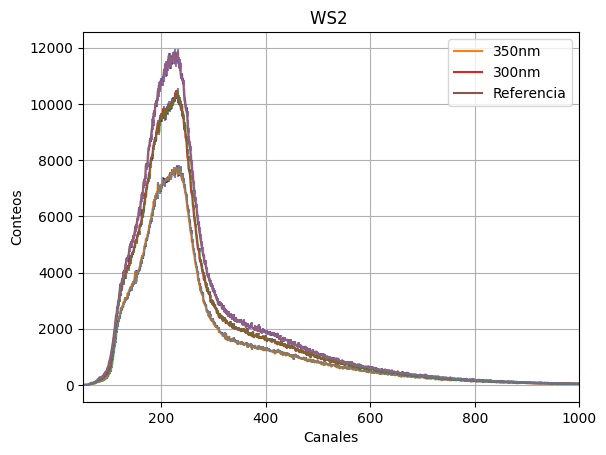

In [ ]:
# Definir los datos y las barras de error para el primer gráfico
archivo_txt = 'Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos2-WS2-350nm--LiveTime300s--ConBloques.txt'
datos = np.loadtxt(archivo_txt)
barras_error = np.sqrt(datos)

# Crear el gráfico de 350 nm
plt.errorbar(range(len(datos)), datos, yerr=barras_error, ecolor='darkblue', alpha=0.5)
plt.plot(Pos2WS2, label="350nm")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 ')
plt.grid(True)

# Agregar el segundo gráfico
archivo_txt2 = 'Muestras/DatosWS2/XrayHV80kV-1uA--CG20-FG10--Pos3-WS2-300nm--LiveTime300s--ConBloques.txt'
datos2 = np.loadtxt(archivo_txt2)
barras_error2 = np.sqrt(datos2)

plt.errorbar(range(len(datos2)), datos2, yerr=barras_error2, ecolor='darkblue', alpha=0.5)
plt.plot(Pos3WS2, label="300nm")

# Agregar el tercer gráfico
archivo_txt3 = 'Muestras/DatosRef1/XrayHV80kV-1uA--CG20-FG10--Pos8-Ref-1Filtro--LiveTime300s--ConBloques.txt'
datos3 = np.loadtxt(archivo_txt3)
barras_error3 = np.sqrt(datos3)

plt.errorbar(range(len(datos3)), datos3, yerr=barras_error3, ecolor='darkblue', alpha=0.5)
plt.plot(Pos8Ref, label="Referencia")

plt.legend()
plt.show()


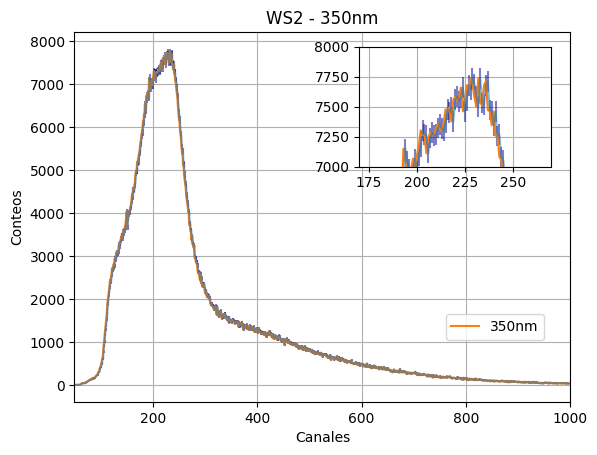

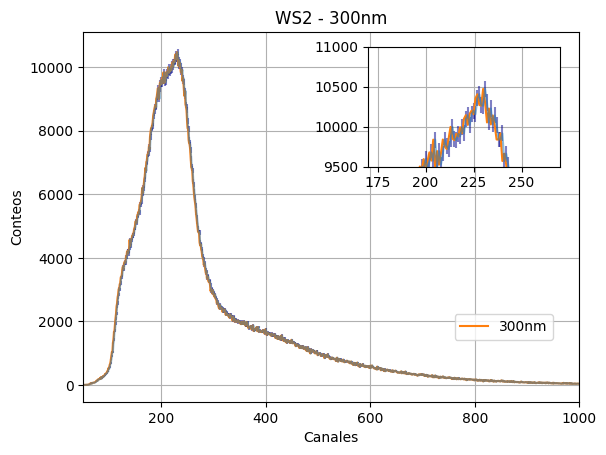

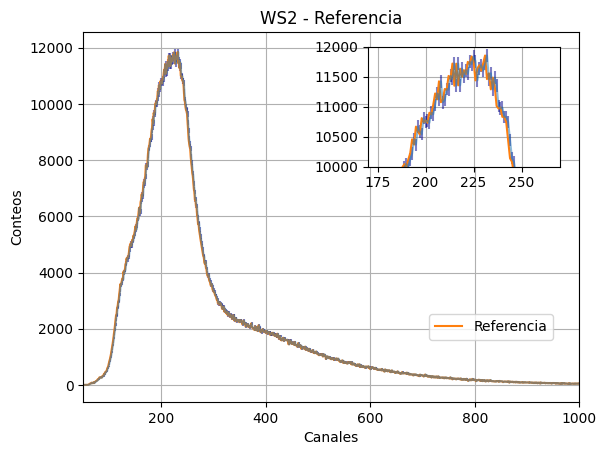

In [ ]:
# Crear el gráfico principal con barras de error
plt.errorbar(range(len(datos)), datos, yerr=barras_error, ecolor='darkblue', alpha=0.5)
plt.plot(Pos2WS2, label="350nm")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 - 350nm')
plt.grid(True)

# Crear el área de zoom-in para el primer gráfico
zoom_ax1 = plt.axes([0.57, 0.6, 0.3, 0.25])
zoom_ax1.errorbar(range(len(datos)), datos, yerr=barras_error, ecolor='darkblue', alpha=0.5)
zoom_ax1.plot(Pos2WS2, label="350nm")
zoom_ax1.set_ylim(7000, 8000)
zoom_ax1.set_xlim(170, 270)
zoom_ax1.grid()

# Mostrar la leyenda en el primergráfico
plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')

plt.show()

# Repetir el proceso para el segundo gráfico
plt.errorbar(range(len(datos2)), datos2, yerr=barras_error2, ecolor='darkblue', alpha=0.5)
plt.plot(Pos3WS2, label="300nm")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 - 300nm')
plt.grid(True)

zoom_ax2 = plt.axes([0.57, 0.6, 0.3, 0.25])
zoom_ax2.errorbar(range(len(datos2)), datos2, yerr=barras_error2, ecolor='darkblue', alpha=0.5)
zoom_ax2.plot(Pos3WS2, label="300nm")
zoom_ax2.set_ylim(9500, 11000)
zoom_ax2.set_xlim(170, 270)
zoom_ax2.grid()

plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')
plt.show()

# Agregar el tercer gráfico y su zoom-in
plt.errorbar(range(len(datos3)), datos3, yerr=barras_error3, ecolor='darkblue', alpha=0.5)
plt.plot(Pos8Ref, label="Referencia")
plt.xlim(50, 1000)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.title('WS2 - Referencia')
plt.grid(True)

zoom_ax3 = plt.axes([0.57, 0.6, 0.3, 0.25])
zoom_ax3.errorbar(range(len(datos3)), datos3, yerr=barras_error3, ecolor='darkblue', alpha=0.5)
zoom_ax3.plot(Pos8Ref, label="Referencia")
zoom_ax3.set_ylim(10000, 12000)
zoom_ax3.set_xlim(170, 270)
zoom_ax3.grid()

plt.legend(bbox_to_anchor=(1, -1.5), loc='lower right')
plt.show()
